# Business Understanding

## Project Domain

Kesehatan Masyarakat & Prediksi Kesehatan Menggunakan Machine Learning

Proyek ini berada dalam ranah data science dan kesehatan masyarakat, khususnya dalam upaya meningkatkan deteksi status merokok berdasarkan parameter biologis (bio-sinyal). Dengan memanfaatkan teknologi machine learning, kita dapat membantu para tenaga medis mengenali kebiasaan merokok tanpa harus bergantung sepenuhnya pada wawancara atau pengisian kuesioner oleh pasien.

## Problem Statements

Merokok terbukti menjadi penyebab utama kematian yang dapat dicegah di dunia. Namun, masih banyak tenaga medis yang menganggap konseling berhenti merokok tidak efektif dan memakan waktu. Selain itu, faktor-faktor yang berkaitan dengan perilaku merokok seperti kadar nikotin, usia mulai merokok, dan kondisi biologis sering menghasilkan prediksi yang tidak konsisten jika digunakan secara terpisah.

Oleh karena itu, dibutuhkan sebuah pendekatan berbasis machine learning untuk memprediksi status merokok seseorang berdasarkan sinyal biologis (bio-signals) mereka secara akurat, otomatis, dan dapat digunakan oleh tenaga medis secara praktis.

## Goals



1. Membangun model machine learning yang mampu memprediksi status merokok (pernah merokok, aktif merokok, atau tidak merokok) berdasarkan data biometrik dan hasil tes kesehatan.
2. Memberikan alat bantu bagi tenaga medis untuk mendeteksi kebiasaan merokok pasien secara objektif dan efisien.
3. Meningkatkan efektivitas intervensi atau program berhenti merokok melalui identifikasi awal berdasarkan prediksi model.

## Solution Statements

1. Menggunakan dataset kesehatan yang mencakup data biologis seperti tekanan darah, kadar kolesterol, kadar gula darah, dan lainnya.

2. Melakukan preprocessing data seperti normalisasi, penanganan missing value, dan encoding variabel kategorik.

3. Melatih beberapa model machine learning (seperti Random Forest, Logistic Regression, atau XGBoost) untuk mengklasifikasikan status merokok berdasarkan fitur biologis.

4. Mengevaluasi model menggunakan metrik klasifikasi (akurasi, precision, recall, F1-score).

5. Menyimpan model terbaik dalam format TFLite agar dapat digunakan dalam aplikasi mobile atau perangkat embedded sebagai alat deteksi cepat status merokok.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"trianaindahp","key":"138b4ce493b548a1ff770bd916966a80"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d gauravduttakiit/smoker-status-prediction-using-biosignals

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction-using-biosignals
License(s): apache-2.0
  0% 0.00/1.30M [00:00<?, ?B/s]
100% 1.30M/1.30M [00:00<00:00, 493MB/s]


In [4]:
!mkdir smoker-status-prediction-using-biosignals
!unzip smoker-status-prediction-using-biosignals.zip -d smoker-status-prediction-using-biosignals
!ls smoker-status-prediction-using-biosignals

Archive:  smoker-status-prediction-using-biosignals.zip
  inflating: smoker-status-prediction-using-biosignals/test_dataset.csv  
  inflating: smoker-status-prediction-using-biosignals/train_dataset.csv  
test_dataset.csv  train_dataset.csv


## Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score


## Exploratory Data Analysis

In [6]:
data = pd.read_csv('/content/smoker-status-prediction-using-biosignals/test_dataset.csv')
data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,170,65,75.1,1.0,0.9,1,1,120,70,...,260,41,132,15.7,1,0.8,24,26,32,0
1,45,170,75,89.0,0.7,1.2,1,1,100,67,...,345,49,140,15.7,1,1.1,26,28,138,0
2,30,180,90,94.0,1.0,0.8,1,1,115,72,...,103,53,103,13.5,1,1.0,19,29,30,0
3,60,170,50,73.0,0.5,0.7,1,1,118,78,...,70,65,108,14.1,1,1.3,31,28,33,0
4,30,170,65,78.0,1.5,1.0,1,1,110,70,...,210,45,103,14.7,1,0.8,21,21,19,0


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['height(cm)'].plot(kind='hist', bins=20, title='height(cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['weight(kg)'].plot(kind='hist', bins=20, title='weight(kg)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['waist(cm)'].plot(kind='hist', bins=20, title='waist(cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='age', y='height(cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='height(cm)', y='weight(kg)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='weight(kg)', y='waist(cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='waist(cm)', y='eyesight(left)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hearing(left)']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('hearing(left)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hearing(left)')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hearing(left)']
  ys = series['height(cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('hearing(left)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hearing(left)')
_ = plt.ylabel('height(cm)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hearing(left)']
  ys = series['weight(kg)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('hearing(left)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hearing(left)')
_ = plt.ylabel('weight(kg)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hearing(left)']
  ys = series['waist(cm)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('hearing(left)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hearing(left)')
_ = plt.ylabel('waist(cm)')

from matplotlib import pyplot as plt
_df_12['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['height(cm)'].plot(kind='line', figsize=(8, 4), title='height(cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['weight(kg)'].plot(kind='line', figsize=(8, 4), title='weight(kg)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['waist(cm)'].plot(kind='line', figsize=(8, 4), title='waist(cm)')
plt.gca().spines[['top', 'right']].set_visible(False)

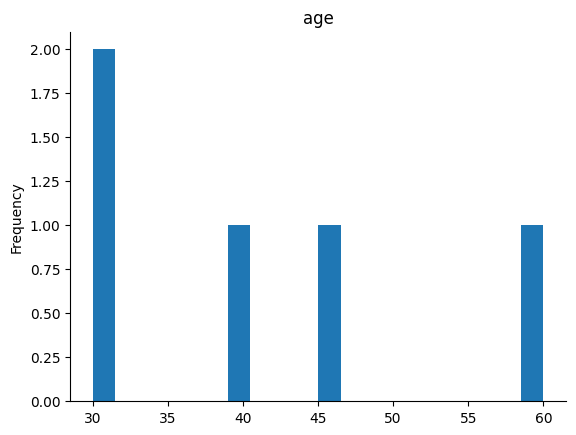

In [8]:
from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

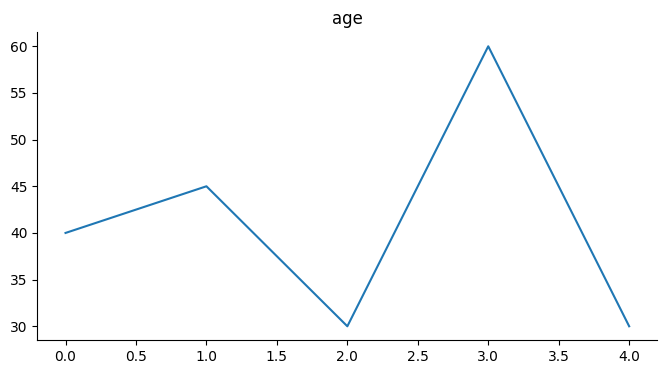

In [9]:
from matplotlib import pyplot as plt
_df_12['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

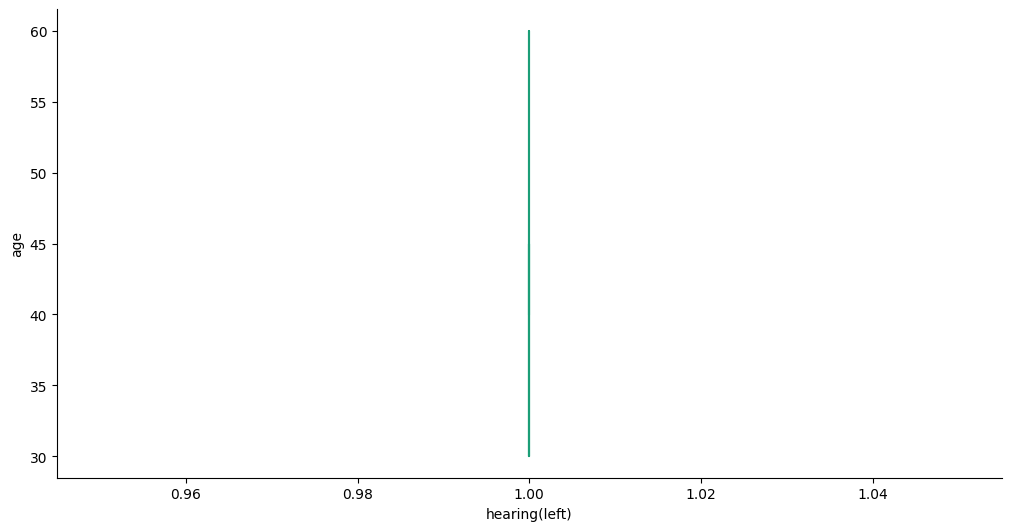

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hearing(left)']
  ys = series['age']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('hearing(left)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hearing(left)')
_ = plt.ylabel('age')

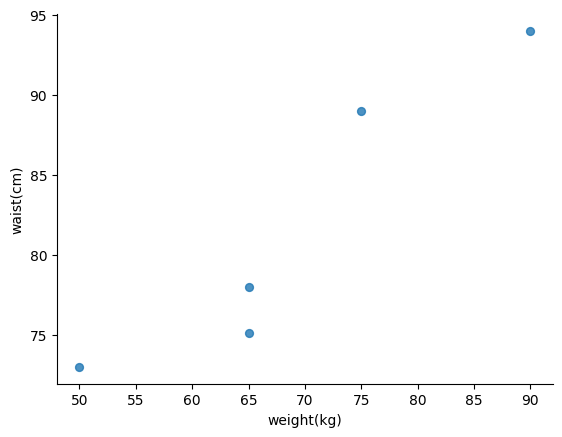

In [11]:
from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='weight(kg)', y='waist(cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

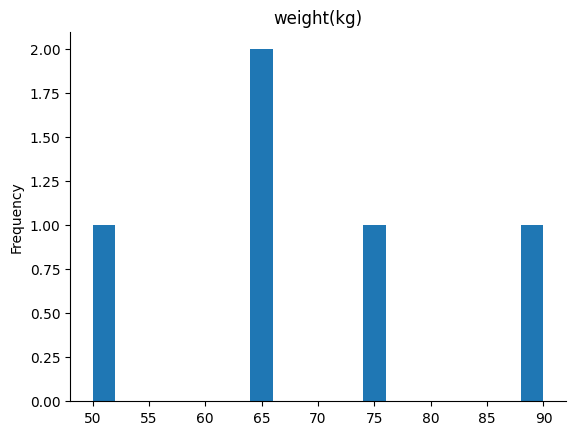

In [12]:
from matplotlib import pyplot as plt
_df_2['weight(kg)'].plot(kind='hist', bins=20, title='weight(kg)')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data Preparation

In [71]:
# Check the existing columns in the DataFrame
print(data.columns)

# Drop only the columns that exist in the DataFrame
columns_to_drop = ['height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(right)', 'eyesight(left)', 'hearing(left)', 'hearing(right)',
                          'fasting blood sugar', 'Urine protein', 'triglyceride', 'AST', 'ALT', 'Gtp']

# Filter columns_to_drop to include only columns that exist in data
existing_columns = [col for col in columns_to_drop if col in data.columns]

data = data.drop(columns=existing_columns)

Index(['age', 'systolic', 'relaxation', 'Cholesterol', 'HDL', 'LDL',
       'hemoglobin', 'serum creatinine', 'dental caries'],
      dtype='object')


In [72]:
data['label_kematian'] = ((data['serum creatinine'] > 1.2) |
                          (data['Cholesterol'] > 240) |
                          (data['age'] > 60)).astype(int)

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(data.drop(columns=['label_kematian']))
y = data['label_kematian']

# Modeling

In [60]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

data = load_iris()
X = data.data
y = data.target

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5204 - loss: 1.0779
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5828 - loss: 0.9564
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6002 - loss: 0.8590
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6532 - loss: 0.7833
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6396 - loss: 0.7160  
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8212 - loss: 0.6630
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8006 - loss: 0.6034 
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8683 - loss: 0.5779 
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8735 - loss: 0.5542 
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8563 - loss: 0.5263
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8251 - loss: 0.5431 
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8

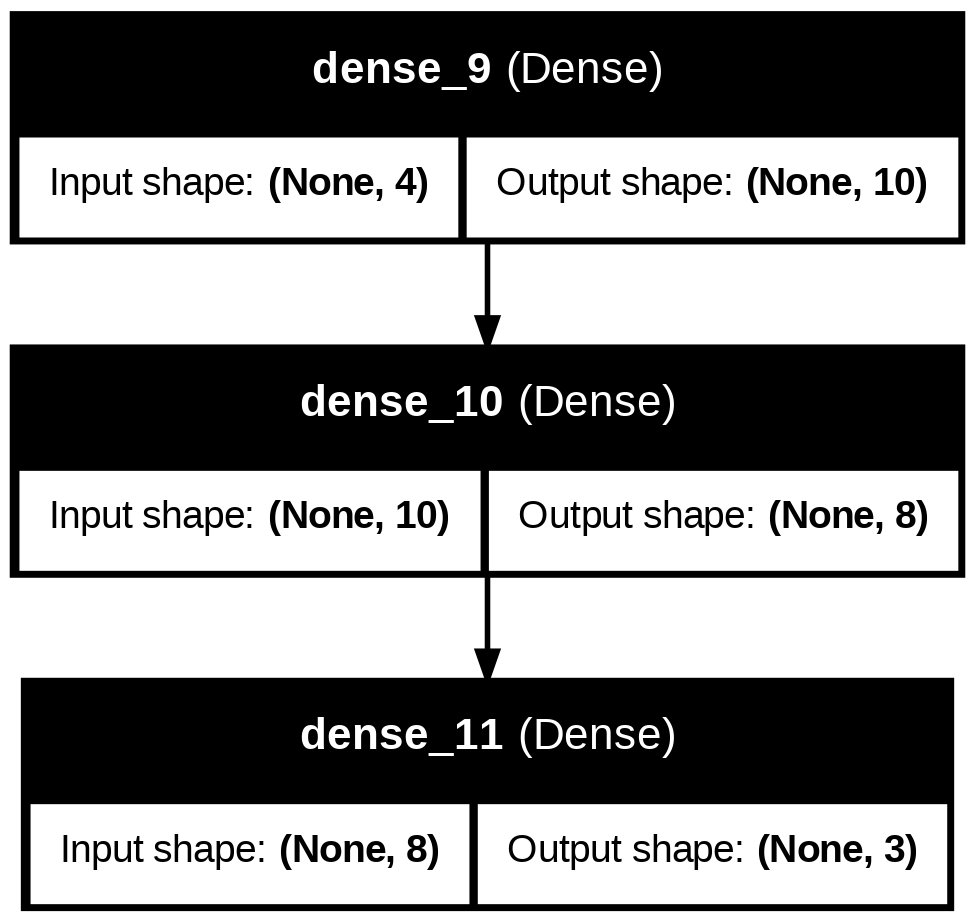

In [61]:
plot_model(model, show_shapes=True, show_layer_names=True)

# Evaluasi

In [76]:
from sklearn.metrics import accuracy_score
import numpy as np

y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Akurasi: {accuracy:.2f}")

Akurasi: 0.90


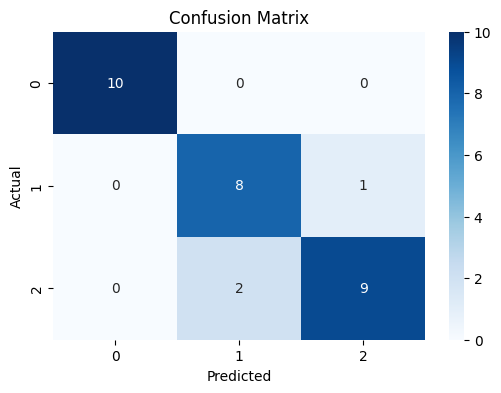

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [78]:
from sklearn.metrics import classification_report
import numpy as np

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)
print(classification_report(y_test_labels, y_pred_labels))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [79]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16708 entries, 0 to 16707
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               16708 non-null  int64  
 1   systolic          16708 non-null  int64  
 2   relaxation        16708 non-null  int64  
 3   Cholesterol       16708 non-null  int64  
 4   HDL               16708 non-null  int64  
 5   LDL               16708 non-null  int64  
 6   hemoglobin        16708 non-null  float64
 7   serum creatinine  16708 non-null  float64
 8   dental caries     16708 non-null  int64  
 9   label_kematian    16708 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.3 MB


In [80]:
data.head()

,age,systolic,relaxation,Cholesterol,HDL,LDL,hemoglobin,serum creatinine,dental caries,label_kematian
0,40,120,70,225,41,132,15.7,0.8,0,0
1,45,100,67,258,49,140,15.7,1.1,0,1
2,30,115,72,177,53,103,13.5,1.0,0,0
3,60,118,78,187,65,108,14.1,1.3,0,1
4,30,110,70,190,45,103,14.7,0.8,0,0


# Deployment

## Model Simulation

In [87]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Data pasien baru (nilai sesuai urutan kolom)
pasien_baru = [[40, 120, 70, 225, 41, 132, 15.7, 0.8, 0]]

# Standardisasi sesuai training data
pasien_baru_scaled = scaler.transform(pasien_baru)

try:
    input_dim = X.shape[1]
except NameError:
    input_dim = 9

model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(f"Model expected input shape: {model.input_shape}")
print(f"New patient data shape: {pasien_baru_scaled.shape}")
hasil = model.predict(pasien_baru_scaled)

predicted_class = (hasil[0][0] > 0.5).astype(int)

print("Prediksi risiko kematian:", "Tinggi" if predicted_class == 1 else "Rendah")

Model expected input shape: (None, 9)
New patient data shape: (1, 9)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
Prediksi risiko kematian: Tinggi


## Save Model

In [88]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
])

In [89]:
model.save('model_kematian.h5')
from google.colab import files
#files.download('model_kematian.h5')

In [90]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('kematian_predict.tflite', 'wb') as f:
    f.write(tflite_model)

#files.download('kematian_predict.tflite')

Saved artifact at '/tmp/tmpqekchxjm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor_42')
Output Type:
  TensorSpec(shape=(None, 32), dtype=tf.float32, name=None)
Captures:
  137825244572624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137825244565904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137825244571280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137825244577232: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [91]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')

#files.download('scaler.pkl')

['scaler.pkl']